In [1]:
from completeRun import featureClf,cv_feature
from preamble import *
from LocalDatasets import saveDict,readDict,ScoresFromPredictions,read_features, read_duration,checkForExist,read_did_pred,ScoresAveraging,DoneFeatureMan
import seaborn as sns
from copy import copy
plt.rcParams['savefig.dpi'] = 200
from preamble import *
Cat = [20, 21, 26, 333, 334, 335,40668, 4135, 4534, 469, 46, 50]

amountList = [0.25,0.5,0.75,1]
NonCat = [1038,1043,1046,1049,1050,1063,1067,1068,1120,1176,11,12,1459,1462,1464,1466,1467,1468,1475,1476,1478,1479,1485,1487]
second = [1489, 1491, 1492, 1493, 1494, 1497, 14, 1501, 1504, 1510, 1515, 1570, 16, 18, 22, 28, 300, 30, 32, 36, 375, 37, 39,40499,40509,40, 4134, 41, 44, 4538, 458, 53, 54]
for i in second:
    NonCat.append(i)
          
cv = 10
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB','GradientBoost']


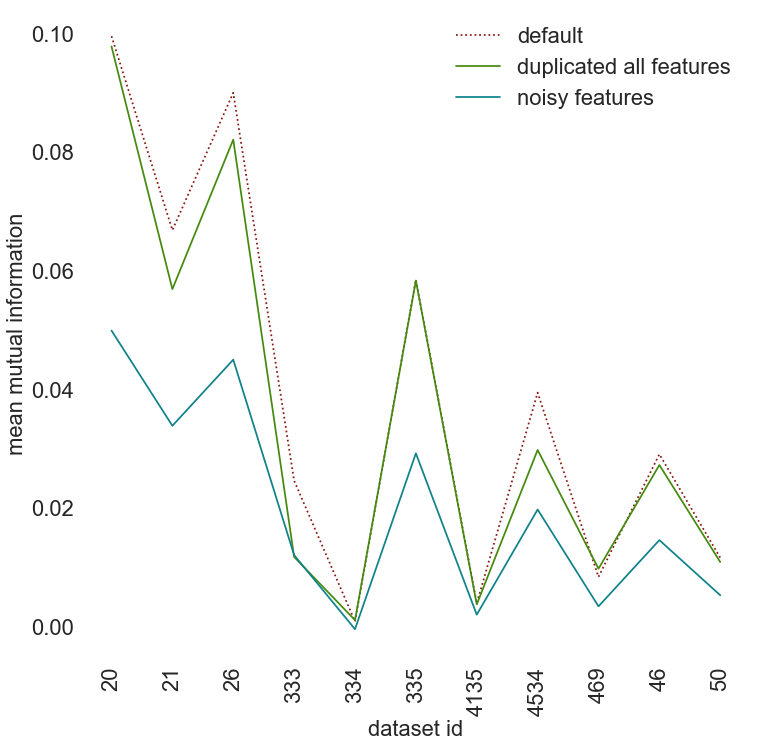

adjusted


In [18]:
#Adjusted Mutual Information 
from LocalDatasets import read_did,read_did_cat,readDict
from metafeatures import information_theoretic_metafeatures
from Noise2 import add_copy,add_copy_features,add_noise_features2,add_noise_features3,create_features
from preamble import *
import sklearn
Cat = [20, 21, 26, 333, 334, 335, 4135, 4534, 469, 46, 50]
did = 46
x1 = []
x2 = []
x3 = []
x4 = []
for did in Cat:
    X,y = read_did(did)
    cat = read_did_cat(did)
    mutual_informations = [sklearn.metrics.adjusted_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x1.append(np.mean(mutual_informations))
#     x1.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation'])
    amount = readDict(did)['NumberOfFeatures'] - 1
    
    X = add_noise_features2(X,cat,amount) 
    for i in range(amount):
        cat.append(True)
    mutual_informations = [sklearn.metrics.adjusted_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x3.append(np.mean(mutual_informations))
#     x3.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation'])
    X,y = read_did(did)
    X = add_copy_features(X,amount)
    mutual_informations = [sklearn.metrics.adjusted_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x2.append(np.mean(mutual_informations))
#     x2.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation'])
    X = create_features(y)
    cat = [True,True]
    mutual_informations = [sklearn.metrics.adjusted_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x4.append(np.mean(mutual_informations))
#     x4.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation'])
fig, ax = plt.subplots()
cl = sns.hls_palette(4, l=.3, s=.8)
x_axis =range(len(Cat))
_= ax.plot(x_axis,x1, color = cl[0],ls = ':' ,label = 'default')
# _= ax.plot(x_axis,x4, color = cl[3] ,label = 'target')
_= ax.plot(x_axis,x2, color = cl[1], label = 'duplicated all features' )
_= ax.plot(x_axis,x3, color = cl[2], label = 'noisy features' )
_=plt.xticks(x_axis, Cat,rotation='vertical')
# _=plt.title('adjusted Mean mutual information for individual datasets')
_=plt.ylabel('mean mutual information')
_=plt.xlabel('dataset id')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(12)
fig.set_figwidth(12)
# ax.set_yscale("log", nonposy='clip')
# plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.legend( prop={'size': 22})
_=plt.show()
print('adjusted')

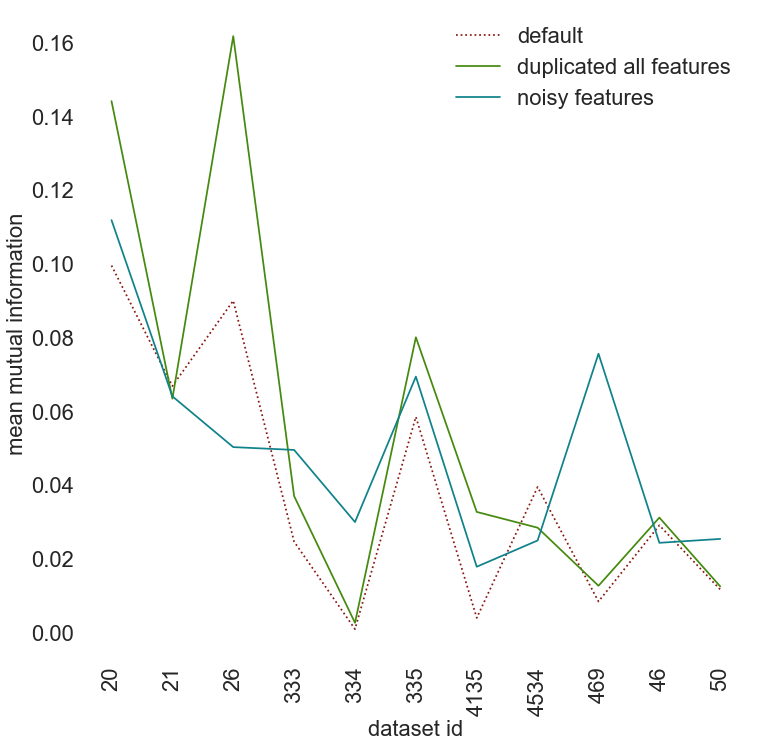

normalized


In [16]:
# normalized mean mutual information
from LocalDatasets import read_did,read_did_cat,readDict
from metafeatures import information_theoretic_metafeatures
from Noise2 import add_copy,add_copy_features,add_noise_features2,add_noise_features3,create_features
from preamble import *
import sklearn
Cat = [20, 21, 26, 333, 334, 335, 4135, 4534, 469, 46, 50]
did = 46
x1 = []
x2 = []
x3 = []
x4 = []
for did in Cat:
    X,y = read_did(did)
    cat = read_did_cat(did)
    mutual_informations = [sklearn.metrics.adjusted_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x1.append(np.mean(mutual_informations))
#     x1.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation'])
    amount = readDict(did)['NumberOfFeatures'] - 1
    
    X = add_noise_features2(X,cat,amount) 
    for i in range(amount):
        cat.append(True)
    mutual_informations = [sklearn.metrics.normalized_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x3.append(np.mean(mutual_informations))
#     x3.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation'])
    X,y = read_did(did)
    X = add_copy_features(X,amount)
    mutual_informations = [sklearn.metrics.normalized_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x2.append(np.mean(mutual_informations))
#     x2.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation'])
    X = create_features(y)
    cat = [True,True]
    mutual_informations = [sklearn.metrics.normalized_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x4.append(np.mean(mutual_informations))
#     x4.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation'])
fig, ax = plt.subplots()
cl = sns.hls_palette(4, l=.3, s=.8)
x_axis =range(len(Cat))
_= ax.plot(x_axis,x1, color = cl[0],ls = ':' ,label = 'default')
# _= ax.plot(x_axis,x4, color = cl[3] ,label = 'target')
_= ax.plot(x_axis,x2, color = cl[1], label = 'duplicated all features' )
_= ax.plot(x_axis,x3, color = cl[2], label = 'noisy features' )
_=plt.xticks(x_axis, Cat,rotation='vertical')
# _=plt.title('adjusted Mean mutual information for individual datasets')
_=plt.ylabel('mean mutual information')
_=plt.xlabel('dataset id')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(12)
fig.set_figwidth(12)
# ax.set_yscale("log", nonposy='clip')
# plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.legend( prop={'size': 22})
_=plt.show()
print('normalized')

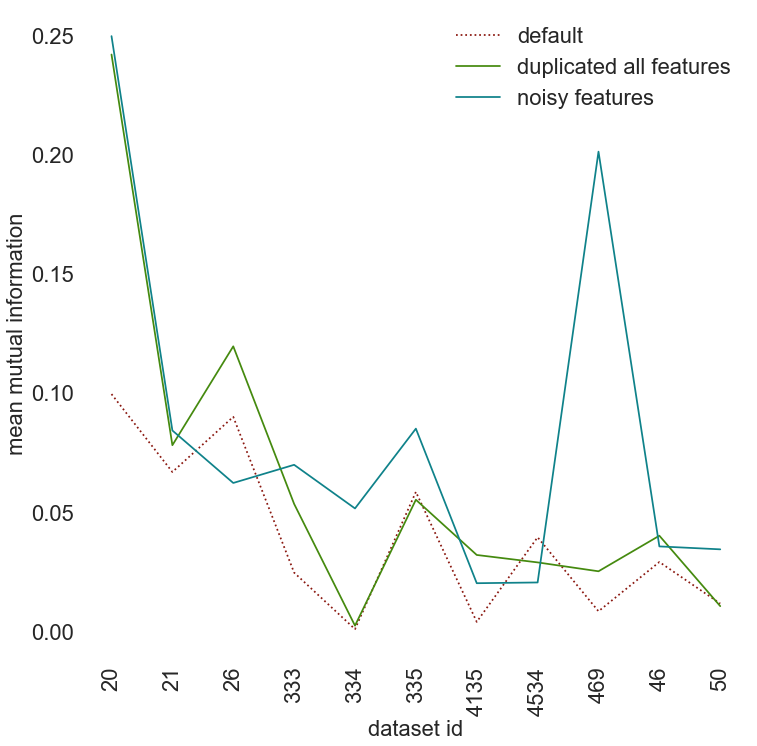

In [15]:
# default mean mutual information
from LocalDatasets import read_did,read_did_cat,readDict
from metafeatures import information_theoretic_metafeatures
from Noise2 import add_copy,add_copy_features,add_noise_features2,add_noise_features3,create_features
from preamble import *
import sklearn
Cat = [20, 21, 26, 333, 334, 335, 4135, 4534, 469, 46, 50]
did = 46
x1 = []
x2 = []
x3 = []
x4 = []
for did in Cat:
    X,y = read_did(did)
    cat = read_did_cat(did)
    mutual_informations = [sklearn.metrics.adjusted_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x1.append(np.mean(mutual_informations))
#     x1.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation'])
    amount = readDict(did)['NumberOfFeatures'] - 1
    
    X = add_noise_features2(X,cat,amount) 
    for i in range(amount):
        cat.append(True)
    mutual_informations = [sklearn.metrics.mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x3.append(np.mean(mutual_informations))
#     x3.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation'])
    X,y = read_did(did)
    X = add_copy_features(X,amount)
    mutual_informations = [sklearn.metrics.mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x2.append(np.mean(mutual_informations))
#     x2.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation'])
    X = create_features(y)
    cat = [True,True]
    mutual_informations = [sklearn.metrics.mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x4.append(np.mean(mutual_informations))
#     x4.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation'])
fig, ax = plt.subplots()
cl = sns.hls_palette(4, l=.3, s=.8)
x_axis =range(len(Cat))
_= ax.plot(x_axis,x1, color = cl[0],ls = ':' ,label = 'default')
# _= ax.plot(x_axis,x4, color = cl[3] ,label = 'target')
_= ax.plot(x_axis,x2, color = cl[1], label = 'duplicated all features' )
_= ax.plot(x_axis,x3, color = cl[2], label = 'noisy features' )
_=plt.xticks(x_axis, Cat,rotation='vertical')
# _=plt.title('adjusted Mean mutual information for individual datasets')
_=plt.ylabel('mean mutual information')
_=plt.xlabel('dataset id')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(12)
fig.set_figwidth(12)
# ax.set_yscale("log", nonposy='clip')
# plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.legend( prop={'size': 22})
_=plt.show()

In [ ]:
# paper comparison
from LocalDatasets import read_did,read_did_cat
from Noise2 import add_noise_featuresN,add_copy_features
import sklearn
mutualInf = []
mutualInf2 = []
amountList = [0,0.25,0.5,0.75,1.0]
n = 3
# Cat.remove(3)
for i,amount in enumerate(amountList):
    mutualInf.append(0)
    mutualInf2.append(0)
    for did in Cat:
        X,y = read_did(did)
        cat = read_did_cat(did)
        if not amount == 0:
            X = add_noise_featuresN(X,cat,round(amount*(readDict(did)['NumberOfFeatures']-1)),n)
            for j in range(round(amount*(readDict(did)['NumberOfFeatures']-1))):
                cat.append(True)
        mut = np.mean([sklearn.metrics.adjusted_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T])/len(Cat)
        if mut < 0 or mut >= 0:
            mutualInf[i] = mutualInf[i] + mut
        
print(mutualInf)
print(mutualInf2)
amountList2 = []
for amount in amountList:
    amountList2.append(int((1-1/(1+amount))*100))
# for i in amountList:
#     amountList2.append(i*100)
amountList3 = ['0%','20%','33%','42%', '50%']
fig, ax = plt.subplots()
# _=plt.title('Adjusted mutual information for datasets with added random features',fontdict = {'fontsize': 22} )
_=ax.plot(amountList2, mutualInf)
# _=ax.plot(amountList2,mutualInf2, ls = ":",label = 'duplicate features')
_=ax.scatter(amountList2, mutualInf)
_=plt.ylabel('Adjusted Mutual Information',fontdict = {'fontsize': 22})
_=plt.xlabel('percentage random features of the total dataset',fontdict = {'fontsize': 22})
_=plt.xticks(amountList2,amountList3 )
fig.set_figheight(9)
fig.set_figwidth(15)
# _=plt.axhline(x = 20,linewidth=2, color = 'k')
for i,amount in enumerate(amountList2):
    _=plt.axvline(x=amount,color= 'black')
    _=plt.axhline(y=mutualInf[i],color = 'black')

ax.set_facecolor('xkcd:white')
_=ax.legend()
plt.show() 

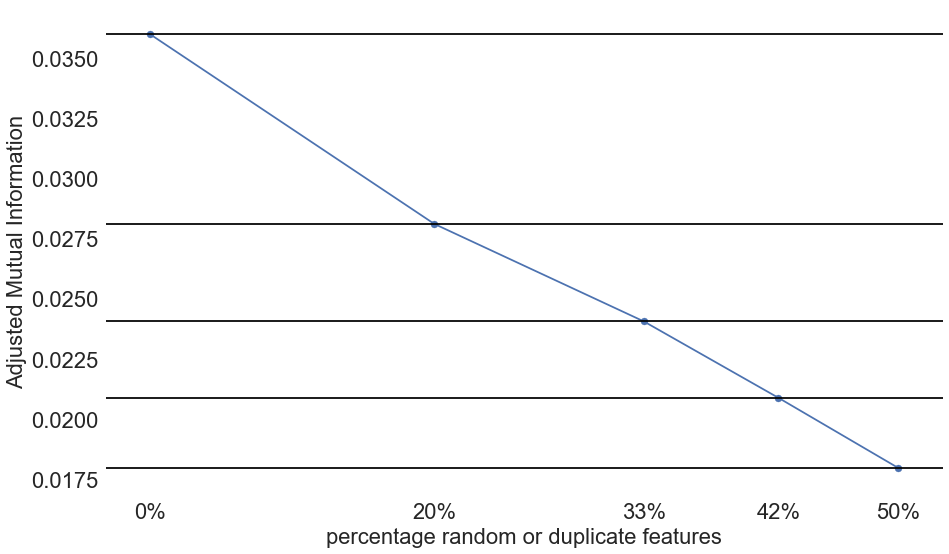

In [11]:
# # mutual information paper style but with dulicates
# from LocalDatasets import read_did,read_did_cat
# from Noise2 import add_noise_featuresN,add_copy_features,add_copy
# import sklearn
# mutualInf = []
# mutualInf2 = []
# amountList = [0,0.25,0.5,0.75,1.0]
# n = 3
# # Cat.remove(3)
# for i,amount in enumerate(amountList):
#     mutualInf.append(0)
#     mutualInf2.append(0)
#     for did in Cat:
#         X,y = read_did(did)
#         cat = read_did_cat(did)
#         if not amount == 0:
#             X = add_noise_featuresN(X,cat,round(amount*(readDict(did)['NumberOfFeatures']-1)),n)
#             for j in range(round(amount*(readDict(did)['NumberOfFeatures']-1))):
#                 cat.append(True)
#         mut = np.mean([sklearn.metrics.adjusted_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T])/len(Cat)
#         if mut < 0 or mut >= 0:
#             mutualInf[i] = mutualInf[i] + mut
#         X,y = read_did(did)
#         if not amount == 0:
#             X = add_copy(X,round(amount*(readDict(did)['NumberOfFeatures']-1)))
#         mut = np.mean([sklearn.metrics.adjusted_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T])/len(Cat)
#         if mut < 0 or mut >= 0:
#             mutualInf2[i] = mutualInf2[i] + mut
# print(mutualInf)
# print(mutualInf2)
# amountList2 = []
# for amount in amountList:
#     amountList2.append(int((1-1/(1+amount))*100))
# # for i in amountList:
# #     amountList2.append(i*100)
# amountList3 = ['0%','20%','33%','42%', '50%']
fig, ax = plt.subplots()
# _=plt.title('Adjusted mutual information for datasets with added random features the straight line and duplicate features the dotted line' )
_=ax.plot(amountList2, mutualInf)
# _=ax.plot(amountList2,mutualInf2, ls = ":",label = 'duplicate features')
_=ax.scatter(amountList2, mutualInf)
_=plt.ylabel('Adjusted Mutual Information')
_=plt.xlabel('percentage random or duplicate features')
_=plt.xticks(amountList2,amountList3 )
fig.set_figheight(9)
fig.set_figwidth(15)
# _=plt.axhline(x = 20,linewidth=2, color = 'k')
for i,amount in enumerate(amountList2):
#     _=plt.axvline(x=amount,color= 'black')
    _=plt.axhline(y=mutualInf[i],color = 'black')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
ax.set_facecolor('xkcd:white')
_=ax.legend()
plt.show()

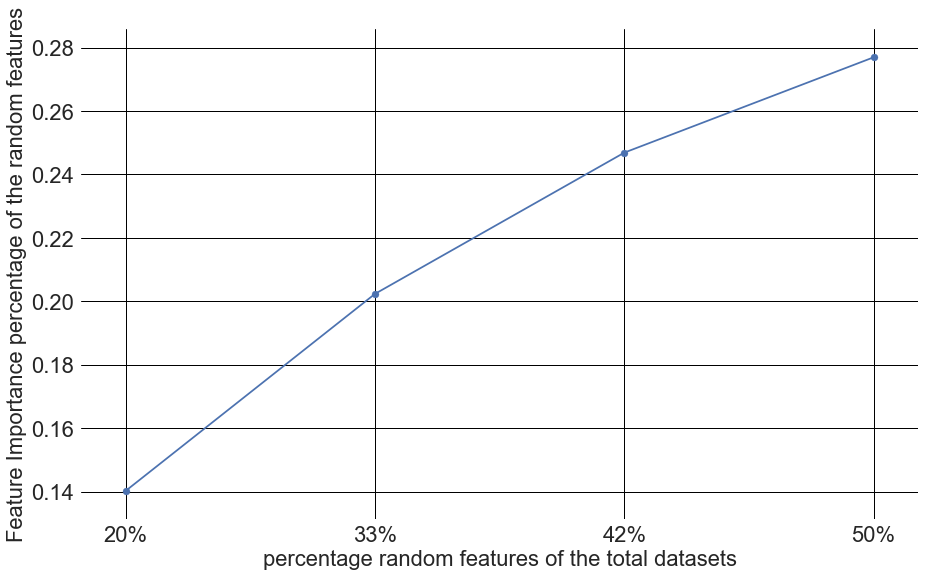

3 numerical


In [18]:
# Feature importance paper style
# from LocalDatasets import read_did,read_did_cat
# from Noise2 import add_noise_featuresN
# from sklearn.ensemble import RandomForestClassifier
# import sklearn
# mutualInf = []
# amountList = [0.25,0.5,0.75,1.0]
# n = 100
# # Cat.remove(3)
# didList = NonCat
# ImpFeats = []
# for i in didList:
#     ImpFeats.append([])
# for i,amount in enumerate(amountList):
#     mutualInf.append(0)
#     for k,did in enumerate(didList):
#         X,y = read_did(did)
#         cat = read_did_cat(did)
#         amountAdded = round(amount*(readDict(did)['NumberOfFeatures']-1))
#         X = add_noise_featuresN(X,cat,amountAdded,n)
#         clf = RandomForestClassifier()
#         clf.fit(X,y)
#         feats_imp = clf.feature_importances_
#         avg = 0
#         for j in range(readDict(did)['NumberOfFeatures']-1,readDict(did)['NumberOfFeatures']-1+amountAdded):
#             avg = avg + feats_imp[j]/len(didList)
#         ImpFeats[k].append(avg*len(didList))
#         if avg < 0 or avg >= 0:
#             mutualInf[i] = mutualInf[i] + avg
# print(mutualInf)
# amountList2 = []
# # for amount in amountList:
# #     amountList2.append(int((1-1/(1+amount))*100))
# for i in amountList:
#     amountList2.append(i*100)
# amountList3 = ['20%','33%','42%', '50%']
mutualInf = [0.14022466823184054, 0.20234258696598623, 0.24686948762943739, 0.27692710666018466]
fig, ax = plt.subplots()
# _=plt.title('Feature importance of random numerical features times one hundred, in numerical datasets' )
_=ax.plot(amountList2, mutualInf)
_=ax.scatter(amountList2, mutualInf)
_=plt.ylabel('Feature Importance percentage of the random features')
_=plt.xlabel('percentage random features of the total datasets')
_=plt.xticks(amountList2,amountList3 )
fig.set_figheight(9)
fig.set_figwidth(15)
# _=plt.axhline(x = 20,linewidth=2, color = 'k')
# for i,amount in enumerate(amountList2):
#     _=plt.axvline(x=amount,color= 'black')
#     _=plt.axhline(y=mutualInf[i],color = 'black')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
_=ax.legend()
plt.show()
print(str(n),'numerical')

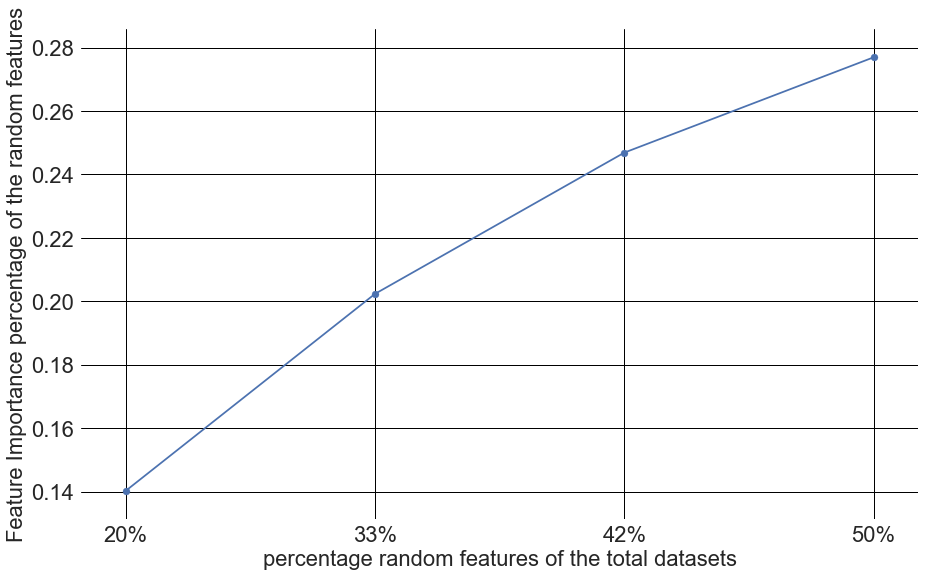

3 numerical


In [17]:
# Feature importance paper style
# from LocalDatasets import read_did,read_did_cat
# from Noise2 import add_noise_featuresN
# from sklearn.ensemble import RandomForestClassifier
# import sklearn
# mutualInf = []
# amountList = [0.25,0.5,0.75,1.0]
# n = 1
# # Cat.remove(3)
# didList = NonCat
# ImpFeats = []
# for i in didList:
#     ImpFeats.append([])
# for i,amount in enumerate(amountList):
#     mutualInf.append(0)
#     for k,did in enumerate(didList):
#         X,y = read_did(did)
#         cat = read_did_cat(did)
#         amountAdded = round(amount*(readDict(did)['NumberOfFeatures']-1))
#         X = add_noise_featuresN(X,cat,amountAdded,n)
#         clf = RandomForestClassifier()
#         clf.fit(X,y)
#         feats_imp = clf.feature_importances_
#         avg = 0
#         for j in range(readDict(did)['NumberOfFeatures']-1,readDict(did)['NumberOfFeatures']-1+amountAdded):
#             avg = avg + feats_imp[j]/len(didList)
#         ImpFeats[k].append(avg*len(didList))
#         if avg < 0 or avg >= 0:
#             mutualInf[i] = mutualInf[i] + avg
# print(mutualInf)
# amountList2 = []
# # for amount in amountList:
# #     amountList2.append(int((1-1/(1+amount))*100))
# for i in amountList:
#     amountList2.append(i*100)
# amountList3 = ['20%','33%','42%', '50%']
mutualInf = [0.14022466823184054, 0.20234258696598623, 0.24686948762943739, 0.27692710666018466]
fig, ax = plt.subplots()
# _=plt.title('Feature importance of random numerical features times one hundred, in numerical datasets' )
_=ax.plot(amountList2, mutualInf)
_=ax.scatter(amountList2, mutualInf)
_=plt.ylabel('Feature Importance percentage of the random features')
_=plt.xlabel('percentage random features of the total datasets')
_=plt.xticks(amountList2,amountList3 )
fig.set_figheight(9)
fig.set_figwidth(15)
# _=plt.axhline(x = 20,linewidth=2, color = 'k')
# for i,amount in enumerate(amountList2):
#     _=plt.axvline(x=amount,color= 'black')
#     _=plt.axhline(y=mutualInf[i],color = 'black')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
_=ax.legend()
plt.show()
print(str(n),'numerical')

[0.11674073986592144, 0.17642297076833774, 0.22837567358067018, 0.28388927491625937]


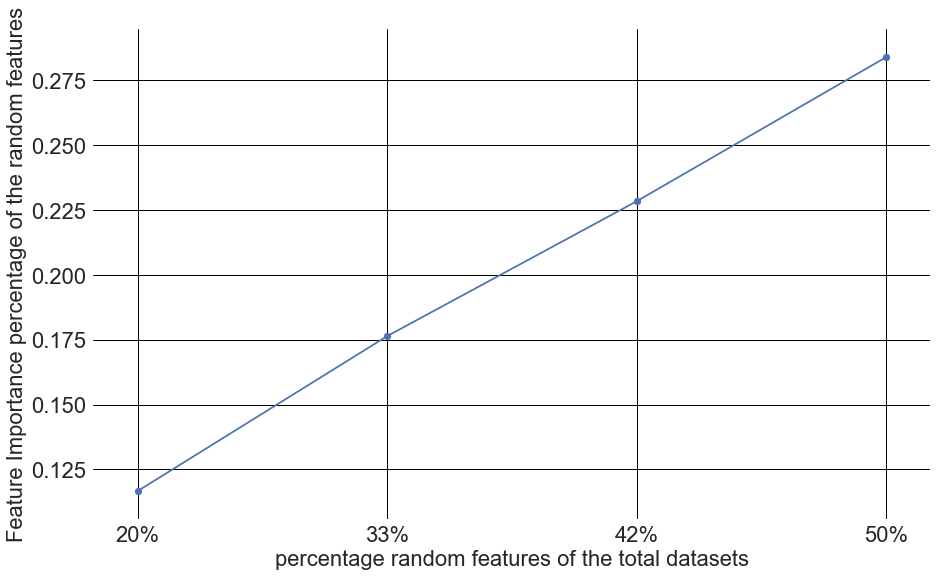

3 categorical


In [19]:
# Feature importance paper style
from LocalDatasets import read_did,read_did_cat
from Noise2 import add_noise_featuresN
from sklearn.ensemble import RandomForestClassifier
import sklearn
mutualInf = []
amountList = [0.25,0.5,0.75,1.0]
n = 3
# Cat.remove(3)
didList = Cat
ImpFeats = []
for i in didList:
    ImpFeats.append([])
for i,amount in enumerate(amountList):
    mutualInf.append(0)
    for k,did in enumerate(didList):
        X,y = read_did(did)
        cat = read_did_cat(did)
        amountAdded = round(amount*(readDict(did)['NumberOfFeatures']-1))
        X = add_noise_featuresN(X,cat,amountAdded,n)
        clf = RandomForestClassifier()
        clf.fit(X,y)
        feats_imp = clf.feature_importances_
        avg = 0
        for j in range(readDict(did)['NumberOfFeatures']-1,readDict(did)['NumberOfFeatures']-1+amountAdded):
            avg = avg + feats_imp[j]/len(didList)
        ImpFeats[k].append(avg*len(didList))
        if avg < 0 or avg >= 0:
            mutualInf[i] = mutualInf[i] + avg
print(mutualInf)
amountList2 = []
# for amount in amountList:
#     amountList2.append(int((1-1/(1+amount))*100))
for i in amountList:
    amountList2.append(i*100)
amountList3 = ['20%','33%','42%', '50%']
fig, ax = plt.subplots()
# _=plt.title('Feature importance of random numerical features times one hundred, in numerical datasets' )
_=ax.plot(amountList2, mutualInf)
_=ax.scatter(amountList2, mutualInf)
_=plt.ylabel('Feature Importance percentage of the random features')
_=plt.xlabel('percentage random features of the total datasets')
_=plt.xticks(amountList2,amountList3 )
fig.set_figheight(9)
fig.set_figwidth(15)
# _=plt.axhline(x = 20,linewidth=2, color = 'k')
# for i,amount in enumerate(amountList2):
#     _=plt.axvline(x=amount,color= 'black')
#     _=plt.axhline(y=mutualInf[i],color = 'black')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
_=ax.legend()
plt.show()
print(str(n),'categorical')

[0.25737990512953463, 0.32904141770279283, 0.38518730881850105, 0.43451710340333588]


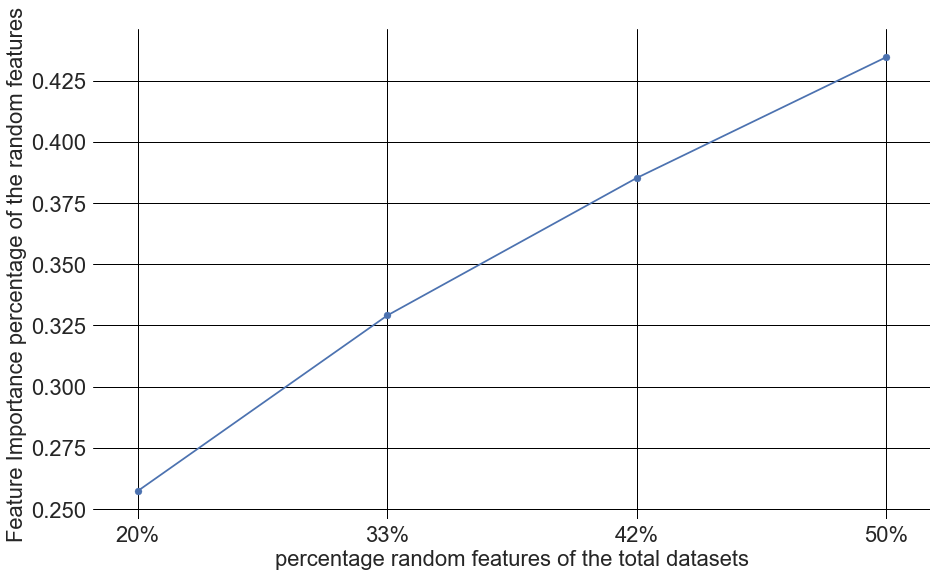

100 categorical


In [15]:
# Feature importance paper style
from LocalDatasets import read_did,read_did_cat
from Noise2 import add_noise_featuresN
from sklearn.ensemble import RandomForestClassifier
import sklearn
mutualInf = []
amountList = [0.25,0.5,0.75,1.0]
n = 100
# Cat.remove(3)
didList = Cat
ImpFeats = []
for i in didList:
    ImpFeats.append([])
for i,amount in enumerate(amountList):
    mutualInf.append(0)
    for k,did in enumerate(didList):
        X,y = read_did(did)
        cat = read_did_cat(did)
        amountAdded = round(amount*(readDict(did)['NumberOfFeatures']-1))
        X = add_noise_featuresN(X,cat,amountAdded,n)
        clf = RandomForestClassifier()
        clf.fit(X,y)
        feats_imp = clf.feature_importances_
        avg = 0
        for j in range(readDict(did)['NumberOfFeatures']-1,readDict(did)['NumberOfFeatures']-1+amountAdded):
            avg = avg + feats_imp[j]/len(didList)
        ImpFeats[k].append(avg*len(didList))
        if avg < 0 or avg >= 0:
            mutualInf[i] = mutualInf[i] + avg
print(mutualInf)
amountList2 = []
# for amount in amountList:
#     amountList2.append(int((1-1/(1+amount))*100))
for i in amountList:
    amountList2.append(i*100)
amountList3 = ['20%','33%','42%', '50%']
fig, ax = plt.subplots()
# _=plt.title('Feature importance of random numerical features times one hundred, in numerical datasets' )
_=ax.plot(amountList2, mutualInf)
_=ax.scatter(amountList2, mutualInf)
_=plt.ylabel('Feature Importance percentage of the random features')
_=plt.xlabel('percentage random features of the total datasets')
_=plt.xticks(amountList2,amountList3 )
fig.set_figheight(9)
fig.set_figwidth(15)
# _=plt.axhline(x = 20,linewidth=2, color = 'k')
# for i,amount in enumerate(amountList2):
#     _=plt.axvline(x=amount,color= 'black')
#     _=plt.axhline(y=mutualInf[i],color = 'black')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
_=ax.legend()
plt.show()
print(str(n),'categorical')

[0.17889702717124648, 0.30281775300146269, 0.41575092403397218, 0.50466080885758913]


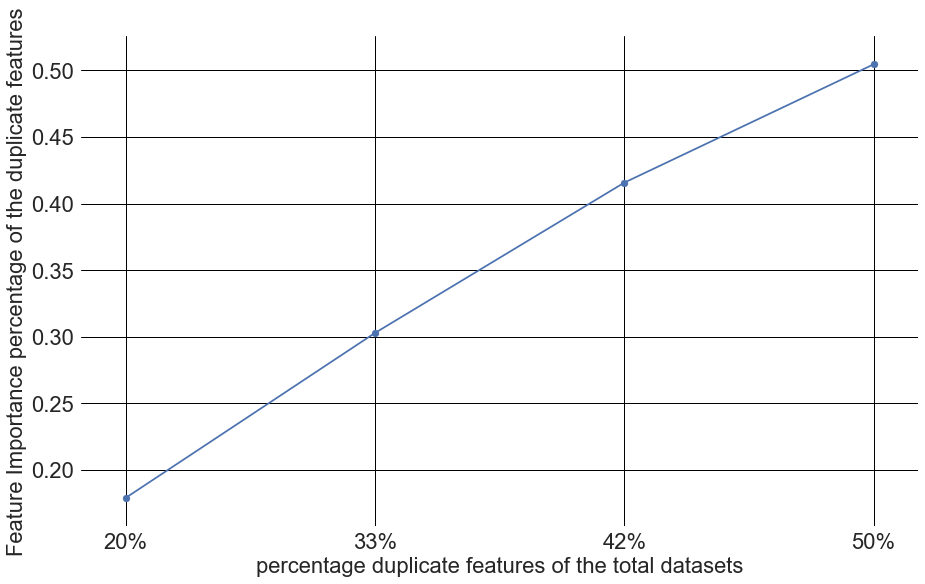

duplicate feature importance


In [21]:
# Feature importance duplicate features
from LocalDatasets import read_did,read_did_cat
from Noise2 import add_noise_featuresN,add_copy
from sklearn.ensemble import RandomForestClassifier
import sklearn
mutualInf = []
amountList = [0.25,0.5,0.75,1.0]
n = 100
# Cat.remove(3)
didList = NonCat
ImpFeats = []
for i in didList:
    ImpFeats.append([])
for i,amount in enumerate(amountList):
    mutualInf.append(0)
    for k,did in enumerate(didList):
        X,y = read_did(did)
        cat = read_did_cat(did)
        amountAdded = round(amount*(readDict(did)['NumberOfFeatures']-1))
        X = add_copy(X,amountAdded)
        clf = RandomForestClassifier()
        clf.fit(X,y)
        feats_imp = clf.feature_importances_
        avg = 0
        for j in range(readDict(did)['NumberOfFeatures']-1,readDict(did)['NumberOfFeatures']-1+amountAdded):
            avg = avg + feats_imp[j]/len(didList)
        ImpFeats[k].append(avg*len(didList))
        if avg < 0 or avg >= 0:
            mutualInf[i] = mutualInf[i] + avg
print(mutualInf)
amountList2 = []
# for amount in amountList:
#     amountList2.append(int((1-1/(1+amount))*100))
for i in amountList:
    amountList2.append(i*100)
amountList3 = ['20%','33%','42%', '50%']
fig, ax = plt.subplots()
# _=plt.title('Feature importance of random numerical features times one hundred, in numerical datasets' )
_=ax.plot(amountList2, mutualInf)
_=ax.scatter(amountList2, mutualInf)
_=plt.ylabel('Feature Importance percentage of the duplicate features')
_=plt.xlabel('percentage duplicate features of the total datasets')
_=plt.xticks(amountList2,amountList3 )
fig.set_figheight(9)
fig.set_figwidth(15)
# _=plt.axhline(x = 20,linewidth=2, color = 'k')
# for i,amount in enumerate(amountList2):
#     _=plt.axvline(x=amount,color= 'black')
#     _=plt.axhline(y=mutualInf[i],color = 'black')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
_=ax.legend()
plt.show()
print('duplicate feature importance, numerical')

[0.16422661194378146, 0.26097624617059628, 0.3570825190448102, 0.48660199350731392]


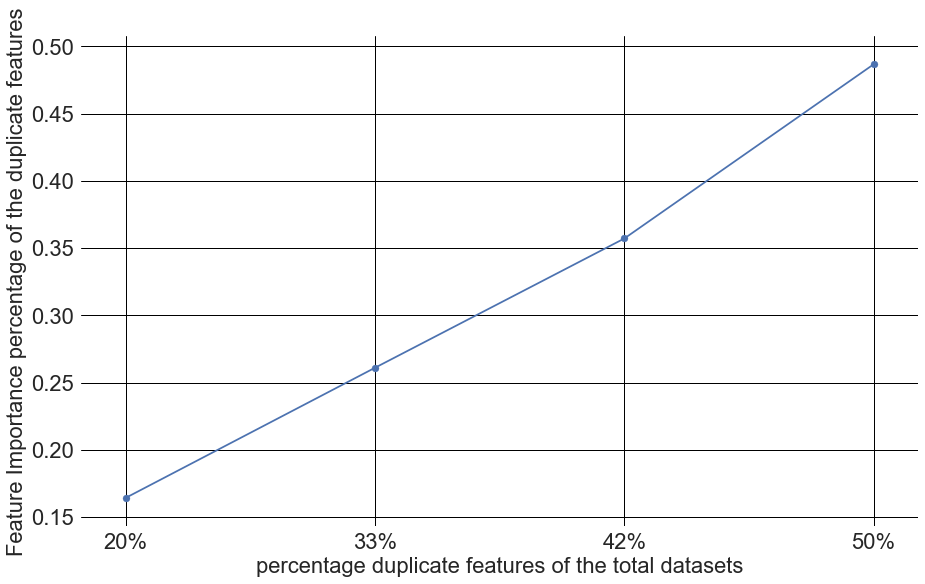

duplicate feature importance categorical


In [22]:
# Feature importance duplicate features
from LocalDatasets import read_did,read_did_cat
from Noise2 import add_noise_featuresN,add_copy
from sklearn.ensemble import RandomForestClassifier
import sklearn
mutualInf = []
amountList = [0.25,0.5,0.75,1.0]
n = 100
# Cat.remove(3)
didList = Cat
ImpFeats = []
for i in didList:
    ImpFeats.append([])
for i,amount in enumerate(amountList):
    mutualInf.append(0)
    for k,did in enumerate(didList):
        X,y = read_did(did)
        cat = read_did_cat(did)
        amountAdded = round(amount*(readDict(did)['NumberOfFeatures']-1))
        X = add_copy(X,amountAdded)
        clf = RandomForestClassifier()
        clf.fit(X,y)
        feats_imp = clf.feature_importances_
        avg = 0
        for j in range(readDict(did)['NumberOfFeatures']-1,readDict(did)['NumberOfFeatures']-1+amountAdded):
            avg = avg + feats_imp[j]/len(didList)
        ImpFeats[k].append(avg*len(didList))
        if avg < 0 or avg >= 0:
            mutualInf[i] = mutualInf[i] + avg
print(mutualInf)
amountList2 = []
# for amount in amountList:
#     amountList2.append(int((1-1/(1+amount))*100))
for i in amountList:
    amountList2.append(i*100)
amountList3 = ['20%','33%','42%', '50%']
fig, ax = plt.subplots()
# _=plt.title('Feature importance of random numerical features times one hundred, in numerical datasets' )
_=ax.plot(amountList2, mutualInf)
_=ax.scatter(amountList2, mutualInf)
_=plt.ylabel('Feature Importance percentage of the duplicate features')
_=plt.xlabel('percentage duplicate features of the total datasets')
_=plt.xticks(amountList2,amountList3 )
fig.set_figheight(9)
fig.set_figwidth(15)
# _=plt.axhline(x = 20,linewidth=2, color = 'k')
# for i,amount in enumerate(amountList2):
#     _=plt.axvline(x=amount,color= 'black')
#     _=plt.axhline(y=mutualInf[i],color = 'black')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
_=ax.legend()
plt.show()
print('duplicate feature importance categorical')

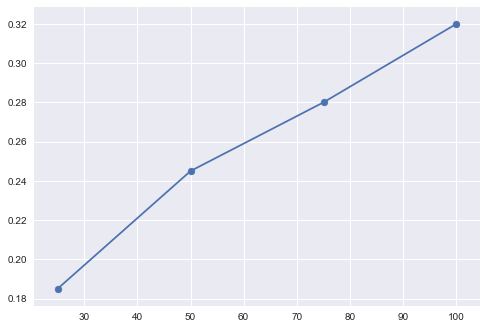

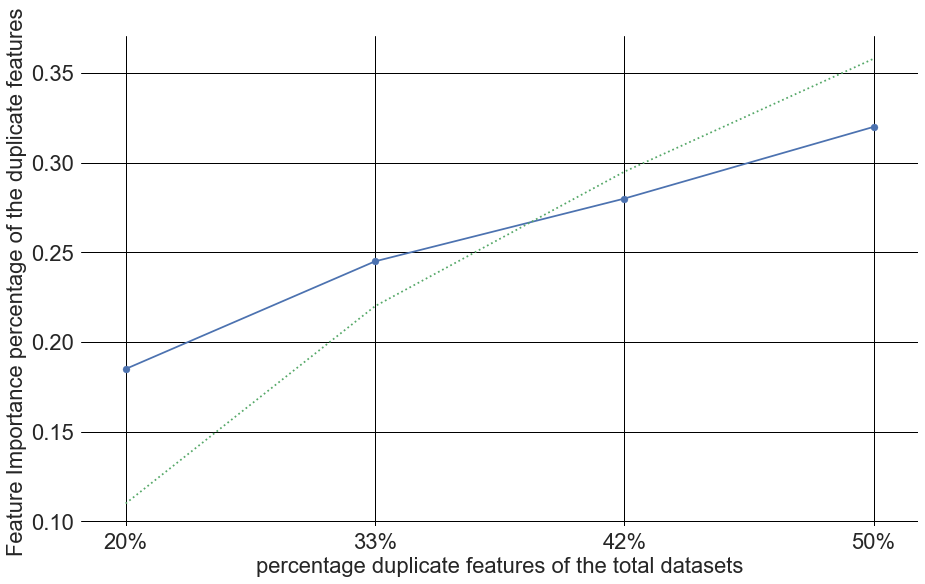

duplicate feature importance categorical


In [24]:
# # Feature importance duplicate features
# from LocalDatasets import read_did,read_did_cat
# from Noise2 import add_noise_featuresN,add_copy
# from sklearn.ensemble import RandomForestClassifier
# import sklearn
# mutualInf = []
# amountList = [0.25,0.5,0.75,1.0]
# n = 100
# # Cat.remove(3)
# didList = Cat
# ImpFeats = []
# for i in didList:
#     ImpFeats.append([])
# for i,amount in enumerate(amountList):
#     mutualInf.append(0)
#     for k,did in enumerate(didList):
#         X,y = read_did(did)
#         cat = read_did_cat(did)
#         amountAdded = round(amount*(readDict(did)['NumberOfFeatures']-1))
#         X = add_copy(X,amountAdded)
#         clf = RandomForestClassifier()
#         clf.fit(X,y)
#         feats_imp = clf.feature_importances_
#         avg = 0
#         for j in range(readDict(did)['NumberOfFeatures']-1,readDict(did)['NumberOfFeatures']-1+amountAdded):
#             avg = avg + feats_imp[j]/len(didList)
#         ImpFeats[k].append(avg*len(didList))
#         if avg < 0 or avg >= 0:
#             mutualInf[i] = mutualInf[i] + avg
# print(mutualInf)
# amountList2 = []
# # for amount in amountList:
# #     amountList2.append(int((1-1/(1+amount))*100))
# for i in amountList:
#     amountList2.append(i*100)
# amountList3 = ['20%','33%','42%', '50%']
mutualInf = [0.185,0.245,0.28,0.32]
mutualInf2 = [0.11,0.22,0.295,0.358]
fig, ax = plt.subplots()
# _=plt.title('Feature importance of random numerical features times one hundred, in numerical datasets' )
_=ax.plot(amountList2, mutualInf)
_=ax.scatter(amountList2, mutualInf)
_=ax.plot(amountList2, mutualInf2, ls = ':')
_=plt.ylabel('Feature Importance percentage of the duplicate features')
_=plt.xlabel('percentage added features of the total datasets')
_=plt.xticks(amountList2,amountList3 )
fig.set_figheight(9)
fig.set_figwidth(15)
# _=plt.axhline(x = 20,linewidth=2, color = 'k')
# for i,amount in enumerate(amountList2):
#     _=plt.axvline(x=amount,color= 'black')
#     _=plt.axhline(y=mutualInf[i],color = 'black')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
_=ax.legend()
plt.show()
print('duplicate feature importance categorical')